In [1]:
# 20230815.pkl

In [2]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install wordcloud


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [4]:
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

In [5]:
df = pd.read_pickle("20230815.pkl")

In [6]:
df.head()

,url,title,corp,thumb,day,time,category,img,text,parsing,ner
0,https://v.daum.net/v/20230815235204399,광화문 시위 중 경찰 폭행한 건설노조 조합원 2명 구속,중앙일보,https://img1.daumcdn.net/thumb/S95x77ht.u/?fna...,20230815,23:52,"[{'cat1': '사회', 'cat2': '사건/사고'}]",https://img1.daumcdn.net/thumb/R658x0.q70/?fna...,사회 광화문 시위 중 경찰 폭행한 건설노조 조합원 2명 구속 김지혜 입력 2023....,"{'parsing_NN': {'title': ['광화문', '시위', '경찰', '...","[[(사회, O), ( , O), (광화문, LOCATION), ( , O), (시..."
1,https://v.daum.net/v/20230815232700287,“대림동서 칼춤 추겠다” 또 협박···30대男 '일베'에 올렸다,서울경제,https://img1.daumcdn.net/thumb/S95x77ht.u/?fna...,20230815,23:27,"[{'cat1': '사회', 'cat2': '사건/사고'}]",https://img4.daumcdn.net/thumb/R658x0.q70/?fna...,사회 “대림동서 칼춤 추겠다” 또 협박···30대男 '일베'에 올렸다 입력 2023...,"{'parsing_NN': {'title': ['대림', '동서', '칼춤', '협...","[[(사회, O), ( , O), (“, O), (대림동, LOCATION), (서..."
2,https://v.daum.net/v/20230815231206214,"길고양이 걷어차고, 사고 막으려 했다던 60대…벌금 100만원",문화일보,https://img1.daumcdn.net/thumb/S95x77ht.u/?fna...,20230815,23:12,"[{'cat1': '사회', 'cat2': '사건/사고'}]",https://img3.daumcdn.net/thumb/R658x0.q70/?fna...,"사회 길고양이 걷어차고, 사고 막으려 했다던 60대…벌금 100만원 입력 2023....","{'parsing_NN': {'title': ['길고양이', '사고', '벌금'],...","[[(사회, O), ( , O), (길고양이, O), ( , O), (걷어차고,, ..."
3,https://v.daum.net/v/20230815224916034,“'강남역 초등생 성폭행' 내가 썼다” 제 발로 경찰서 찾아간 10대,서울경제,https://img1.daumcdn.net/thumb/S95x77ht.u/?fna...,20230815,22:49,"[{'cat1': '사회', 'cat2': '사건/사고'}]",https://img1.daumcdn.net/thumb/R658x0.q70/?fna...,사회 “'강남역 초등생 성폭행' 내가 썼다” 제 발로 경찰서 찾아간 10대 입력 2...,"{'parsing_NN': {'title': ['강남역', '초등', '성폭행', ...","[[(사회, O), ( , O), (“', O), (강남역, LOCATION), (..."
4,https://v.daum.net/v/20230815223905969,‘강남 초등생 성폭행 예고글 내가 썼다’…고교생 자수,문화일보,https://img1.daumcdn.net/thumb/S95x77ht.u/?fna...,20230815,22:39,"[{'cat1': '사회', 'cat2': '사건/사고'}]",https://img4.daumcdn.net/thumb/R658x0.q70/?fna...,사회 ‘강남 초등생 성폭행 예고글 내가 썼다’…고교생 자수 입력 2023. 8. 1...,"{'parsing_NN': {'title': ['강남', '초등', '성폭행', '...","[[(사회, O), ( , O), (‘, O), (강남, LOCATION), ( ,..."


In [7]:
df['ner'].iloc[0]

[[('사회', 'O'),
  (' ', 'O'),
  ('광화문', 'LOCATION'),
  (' ', 'O'),
  ('시위', 'O'),
  (' ', 'O'),
  ('중', 'O'),
  (' ', 'O'),
  ('경찰', 'ORGANIZATION'),
  (' ', 'O'),
  ('폭행한', 'O'),
  (' ', 'O'),
  ('건설노조', 'O'),
  (' ', 'O'),
  ('조합원', 'CIVILIZATION'),
  (' ', 'O'),
  ('2명', 'QUANTITY'),
  (' ', 'O'),
  ('구속', 'O'),
  (' ', 'O'),
  ('김지혜', 'PERSON'),
  (' ', 'O'),
  ('입력', 'O'),
  (' ', 'O'),
  ('2023. 8. 15. 23:52', 'TIME'),
  (' ', 'O'),
  ('수정', 'O'),
  (' ', 'O'),
  ('2023. 8. 16', 'DATE'),
  ('. 05:36', 'TIME'),
  (' ', 'O'),
  ('번역', 'O'),
  (' ', 'O'),
  ('설정', 'O'),
  (' ', 'O'),
  ('번역beta', 'O'),
  (' ', 'O'),
  ('Translated', 'O'),
  (' ', 'O'),
  ('by', 'O'),
  (' ', 'O'),
  ('kaka', 'O'),
  (' ', 'O'),
  ('i', 'O'),
  (' ', 'O'),
  ('한국어', 'CIVILIZATION'),
  (' ', 'O'),
  ('-', 'O'),
  (' ', 'O'),
  ('English', 'O'),
  (' ', 'O'),
  ('영어', 'CIVILIZATION'),
  (' ', 'O'),
  ('日', 'CIVILIZATION'),
  ('本語', 'O'),
  (' ', 'O'),
  ('일본어', 'CIVILIZATION'),
  (' ', 'O'),
  ('简体中文', 

In [8]:
ignore_word_list = ['한국어',
 '영어',
 '日',
 '일본어',
 '중국어',
 '네델란드어',
 '독일어',
 '러시아',
 '말레이시아어',
 '벵골',
 '베트남어',
 '스페인어',
 '아랍어',
 '이탈리아어',
 'Indone',
 '인도네시아어',
 '태국어',
 '터키',
 '포르투갈어',
 '프랑스어',
 '힌디',
 '좌우',
 '다음뉴스',
 '러시아어',
 'Españo',
 '터키어']

In [9]:
for i in df['ner'].iloc[0][2]:
    if i[1] != 'O':
        print(i)

('다음뉴스', 'TERM')


In [10]:
temp = []
for idx, sent in enumerate(df['ner'].iloc[0]):
#     print(idx+1)
    for i in sent:
        if i[1] != 'O':
            if i[0] not in ignore_word_list:
                temp.append(i[0])

In [11]:
temp

['광화문',
 '경찰',
 '조합원',
 '2명',
 '김지혜',
 '2023. 8. 15. 23:52',
 '2023. 8. 16',
 '. 05:36',
 '파',
 '서울동부지법',
 '경찰관',
 '민주노총',
 '건설노조',
 '조합원',
 '2명',
 '서울동부지법',
 '15일',
 '오후',
 '조합원',
 '정',
 '문',
 '피의자',
 '지난 12일',
 '오후',
 '서울',
 '종로구',
 '광화문광장',
 '세종',
 '대왕 동상',
 '앞',
 '일본',
 '방사성 오염수',
 '경찰관',
 '공무집행방해',
 '서울',
 '성동경찰서',
 '14일',
 '경찰',
 '세종',
 '대왕',
 '김은형',
 '민주노총',
 '부위원장',
 '2명',
 '집회및시위에관한법률',
 '김',
 '부위원장',
 '2명',
 '서울',
 '혜화경찰서',
 '지난 13일',
 '오후',
 '의사',
 '춘천',
 '레고랜드',
 '모',
 '생식기 발달장애',
 '국민',
 '대통령',
 '아들',
 '학자',
 '아',
 '줌마',
 '시어머니',
 '머리',
 '며느리',
 '200억',
 '박수홍',
 '형수',
 '횡령',
 '새만금',
 '국회',
 '2년 전',
 '목포',
 '30대',
 '해양경찰',
 '살인',
 '부영',
 '회장',
 '동창',
 '1억원',
 '김혜수',
 '다이아몬드',
 '엄마',
 'ATM기',
 '타임톡beta',
 '00:00:00',
 '타임톡',
 'IT',
 'TV',
 'TO',
 '축구',
 '축구',
 '야구',
 '야구',
 '골프',
 '농구',
 '배구']

In [12]:
from collections import Counter
import operator

In [13]:
Counter(temp)

Counter({'2명': 4,
         '조합원': 3,
         '오후': 3,
         '서울': 3,
         '경찰': 2,
         '서울동부지법': 2,
         '경찰관': 2,
         '민주노총': 2,
         '세종': 2,
         '부위원장': 2,
         '축구': 2,
         '야구': 2,
         '광화문': 1,
         '김지혜': 1,
         '2023. 8. 15. 23:52': 1,
         '2023. 8. 16': 1,
         '. 05:36': 1,
         '파': 1,
         '건설노조': 1,
         '15일': 1,
         '정': 1,
         '문': 1,
         '피의자': 1,
         '지난 12일': 1,
         '종로구': 1,
         '광화문광장': 1,
         '대왕 동상': 1,
         '앞': 1,
         '일본': 1,
         '방사성 오염수': 1,
         '공무집행방해': 1,
         '성동경찰서': 1,
         '14일': 1,
         '대왕': 1,
         '김은형': 1,
         '집회및시위에관한법률': 1,
         '김': 1,
         '혜화경찰서': 1,
         '지난 13일': 1,
         '의사': 1,
         '춘천': 1,
         '레고랜드': 1,
         '모': 1,
         '생식기 발달장애': 1,
         '국민': 1,
         '대통령': 1,
         '아들': 1,
         '학자': 1,
         '아': 1,
         '줌마': 1,
         '시어

In [14]:
sorted(Counter(temp).items(), key=operator.itemgetter(1), reverse=True)

[('2명', 4),
 ('조합원', 3),
 ('오후', 3),
 ('서울', 3),
 ('경찰', 2),
 ('서울동부지법', 2),
 ('경찰관', 2),
 ('민주노총', 2),
 ('세종', 2),
 ('부위원장', 2),
 ('축구', 2),
 ('야구', 2),
 ('광화문', 1),
 ('김지혜', 1),
 ('2023. 8. 15. 23:52', 1),
 ('2023. 8. 16', 1),
 ('. 05:36', 1),
 ('파', 1),
 ('건설노조', 1),
 ('15일', 1),
 ('정', 1),
 ('문', 1),
 ('피의자', 1),
 ('지난 12일', 1),
 ('종로구', 1),
 ('광화문광장', 1),
 ('대왕 동상', 1),
 ('앞', 1),
 ('일본', 1),
 ('방사성 오염수', 1),
 ('공무집행방해', 1),
 ('성동경찰서', 1),
 ('14일', 1),
 ('대왕', 1),
 ('김은형', 1),
 ('집회및시위에관한법률', 1),
 ('김', 1),
 ('혜화경찰서', 1),
 ('지난 13일', 1),
 ('의사', 1),
 ('춘천', 1),
 ('레고랜드', 1),
 ('모', 1),
 ('생식기 발달장애', 1),
 ('국민', 1),
 ('대통령', 1),
 ('아들', 1),
 ('학자', 1),
 ('아', 1),
 ('줌마', 1),
 ('시어머니', 1),
 ('머리', 1),
 ('며느리', 1),
 ('200억', 1),
 ('박수홍', 1),
 ('형수', 1),
 ('횡령', 1),
 ('새만금', 1),
 ('국회', 1),
 ('2년 전', 1),
 ('목포', 1),
 ('30대', 1),
 ('해양경찰', 1),
 ('살인', 1),
 ('부영', 1),
 ('회장', 1),
 ('동창', 1),
 ('1억원', 1),
 ('김혜수', 1),
 ('다이아몬드', 1),
 ('엄마', 1),
 ('ATM기', 1),
 ('타임톡beta', 1),
 ('00:00:00'

In [15]:
import glob

In [16]:
# pkl 파일들이 있는 디렉토리 경로
directory_path = '/Users/wooseok/Data_Analytics/Practice/230822_NewsKeyword/'

# 디렉토리 내의 모든 pkl 파일 경로를 리스트로 가져오기
pkl_files = glob.glob(directory_path + '*.pkl')

# 모든 pkl 파일을 담을 빈 리스트 생성
dfs = []

# 각 pkl 파일을 순회하며 데이터프레임을 리스트에 추가
for pkl_file in pkl_files:
    try:
        df = pd.read_pickle(pkl_file)
        dfs.append(df)
        print('pickle 파일 추가 완료')
    except Exception as e:
        print("파일을 읽던 중 오류가 발생했습니다:", str(e))

# 리스트에 있는 모든 데이터프레임을 하나로 병합
combined_df = pd.concat(dfs, ignore_index=True)

# 결과 데이터프레임 출력
print(combined_df.head())

pickle 파일 추가 완료
pickle 파일 추가 완료
pickle 파일 추가 완료
pickle 파일 추가 완료
pickle 파일 추가 완료
pickle 파일 추가 완료
pickle 파일 추가 완료
                                      url  \
0  https://v.daum.net/v/20230815235204399   
1  https://v.daum.net/v/20230815232700287   
2  https://v.daum.net/v/20230815231206214   
3  https://v.daum.net/v/20230815224916034   
4  https://v.daum.net/v/20230815223905969   

                                    title  corp  \
0          광화문 시위 중 경찰 폭행한 건설노조 조합원 2명 구속  중앙일보   
1     “대림동서 칼춤 추겠다” 또 협박···30대男 '일베'에 올렸다  서울경제   
2      길고양이 걷어차고, 사고 막으려 했다던 60대…벌금 100만원  문화일보   
3  “'강남역 초등생 성폭행' 내가 썼다” 제 발로 경찰서 찾아간 10대  서울경제   
4           ‘강남 초등생 성폭행 예고글 내가 썼다’…고교생 자수  문화일보   

                                               thumb       day   time  \
0  https://img1.daumcdn.net/thumb/S95x77ht.u/?fna...  20230815  23:52   
1  https://img1.daumcdn.net/thumb/S95x77ht.u/?fna...  20230815  23:27   
2  https://img1.daumcdn.net/thumb/S95x77ht.u/?fna...  20230815  23:12   
3  https://img1.da

In [17]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146500 entries, 0 to 146499
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   url       146500 non-null  object
 1   title     146500 non-null  object
 2   corp      146500 non-null  object
 3   thumb     146500 non-null  object
 4   day       146500 non-null  object
 5   time      146500 non-null  object
 6   category  146500 non-null  object
 7   img       146500 non-null  object
 8   text      146500 non-null  object
 9   parsing   146500 non-null  object
 10  ner       146500 non-null  object
dtypes: object(11)
memory usage: 12.3+ MB


In [18]:
# combined_df.to_csv('combined_keyword.csv', index=False, quoting=3, escapechar='\\')

In [53]:
output_interval = 1  # 출력 간격 설정
temp = []

for i in range(0, len(combined_df['title']), output_interval):
    if "금리" in combined_df['title'][i]:
        text = combined_df['text'][i]
        end_phrase = "닫기 인쇄하기"
        end = text.find(end_phrase)
        
        if end != -1:
            new_text = text[end + len(end_phrase):]  # "닫기 인쇄하기" 이후 내용만 남김
        else:
            new_text = text
        
        # "타임톡beta" 라는 문장 뒤의 내용 삭제
        time_talk_index = new_text.find("beta")
        if time_talk_index != -1:
            new_text = new_text[:time_talk_index]

        # "이 기사에 대해 어떻게 생각하시나요" 뒤의 내용 삭제
        how_about_you = new_text.find("이 기사에 대해 어떻게 생각하시나요")
        if how_about_you != -1:
            new_text = new_text[:how_about_you]

        temp.append([combined_df['day'][i], combined_df['title'][i], new_text])


# temp 리스트를 데이터프레임으로 변환
df = pd.DataFrame(temp, columns=['day', 'title', 'new_text'])

# 데이터프레임 출력
print(df)

csv_filename = "interest_keyword_v0.2.csv"  # 출력할 CSV 파일의 이름
df.to_csv(csv_filename, index=False)

print(f"CSV 파일 '{csv_filename}'로 저장되었습니다.")

          day                                      title  \
0    20230815  [fn이사람] "中企는 여력 없는 녹색전환… 금리혜택 등 도움 필요합니다"   
1    20230815                 ‘저금리 대출’ 속여 현금 가로챈 30대 징역형   
2    20230815     `경제 나락` 아르헨 기준금리 118%…한 번에 21%p 인상 초강수   
3    20230815             4%대 예금 반갑기는 하지만… "대출금리도 뛸까 불안"   
4    20230815                               카드론 금리 또 오를까   
..        ...                                        ...   
723  20230818             뉴욕증시, 국채금리 상승에 하락…나스닥 1.17%↓마감   
724  20230818        미국 30년 고정 모기지 금리 7% 돌파…2002년 이후 최고치   
725  20230818              은행, ESG 활동 동참하면 우대금리 주는 적금 출시   
726  20230818                   비트코인, 7% 폭락…美 국채금리 상승 영향   
727  20230818          中 부동산, 美 고금리…尹정부 인식도 대응도 안이하다[사설]   

                                              new_text  
0     유인식 IBK기업은행 전략기획부 ESG경영부장녹색금융 이야기 아닌 행동할 때......  
1      대구지방법원은 은행 직원을 사칭해 저금리에 대환대출을 해주겠다고 속이고 돈을 가...  
2      아르헨티나 중앙은행(BCRA)은 14일(현지시간) 기준금리를 97.00%에서 1...  
3     제일·수협·부산은행서 출시예금잔액, 한달새 12조 불어저축은행도 줄줄이 금리인상조

In [19]:
# combined_df = pd.read_csv('combined_keyword.csv')
combined_df['ner'].iloc[0]

[[('사회', 'O'),
  (' ', 'O'),
  ('광화문', 'LOCATION'),
  (' ', 'O'),
  ('시위', 'O'),
  (' ', 'O'),
  ('중', 'O'),
  (' ', 'O'),
  ('경찰', 'ORGANIZATION'),
  (' ', 'O'),
  ('폭행한', 'O'),
  (' ', 'O'),
  ('건설노조', 'O'),
  (' ', 'O'),
  ('조합원', 'CIVILIZATION'),
  (' ', 'O'),
  ('2명', 'QUANTITY'),
  (' ', 'O'),
  ('구속', 'O'),
  (' ', 'O'),
  ('김지혜', 'PERSON'),
  (' ', 'O'),
  ('입력', 'O'),
  (' ', 'O'),
  ('2023. 8. 15. 23:52', 'TIME'),
  (' ', 'O'),
  ('수정', 'O'),
  (' ', 'O'),
  ('2023. 8. 16', 'DATE'),
  ('. 05:36', 'TIME'),
  (' ', 'O'),
  ('번역', 'O'),
  (' ', 'O'),
  ('설정', 'O'),
  (' ', 'O'),
  ('번역beta', 'O'),
  (' ', 'O'),
  ('Translated', 'O'),
  (' ', 'O'),
  ('by', 'O'),
  (' ', 'O'),
  ('kaka', 'O'),
  (' ', 'O'),
  ('i', 'O'),
  (' ', 'O'),
  ('한국어', 'CIVILIZATION'),
  (' ', 'O'),
  ('-', 'O'),
  (' ', 'O'),
  ('English', 'O'),
  (' ', 'O'),
  ('영어', 'CIVILIZATION'),
  (' ', 'O'),
  ('日', 'CIVILIZATION'),
  ('本語', 'O'),
  (' ', 'O'),
  ('일본어', 'CIVILIZATION'),
  (' ', 'O'),
  ('简体中文', 

In [20]:
# for i in combined_df['ner'].iloc[0][2]:
#     if i[1] != 'O':
#         print(i)

In [21]:
# combined_temp = []

# for sent_list in combined_df['ner']:
#     for sent in sent_list:
#         for i in sent:
#             if i[1] != 'O':
#                 if i[0] not in ignore_word_list:
#                     combined_temp.append(i[0])
                    
# combined_temp

In [22]:
# combined_temp = []

# for idx, sent in enumerate(combined_df['ner']):
# #     print(idx+1)
#     for i in sent:
#         # print(i)
#     #     break
#     # break
#         if i[1] != 'O':
#             if i[0] not in ignore_word_list:
#                 combined_temp.append(i[0])
                
# combined_temp

In [23]:
# i[1]

In [24]:
# i

In [25]:
# i[0] not in ignore_word_list

In [26]:
# i[0]

In [27]:
# i[1]

In [28]:
# sorted(Counter(combined_temp).items(), key=operator.itemgetter(1), reverse=True)

In [29]:
# output_interval = 1 # 출력 간격 설정

# for i in range(0, len(combined_df['title']), output_interval):
#     if "금리" in combined_df['title'][i]:
#         print(combined_df['title'][i])

In [30]:
# interest_df = pd.read_csv('interest_keyword.csv')
interest_df = combined_df[combined_df['title'].str.contains("금리")]
interest_df.info()
# df.to_csv('interest_keyword.csv', index=False, quoting=3, escapechar='\\')

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 223 to 146171
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   url       728 non-null    object
 1   title     728 non-null    object
 2   corp      728 non-null    object
 3   thumb     728 non-null    object
 4   day       728 non-null    object
 5   time      728 non-null    object
 6   category  728 non-null    object
 7   img       728 non-null    object
 8   text      728 non-null    object
 9   parsing   728 non-null    object
 10  ner       728 non-null    object
dtypes: object(11)
memory usage: 68.2+ KB


In [52]:
# interest_df.info()
# interest_df.to_csv('interest_keyword.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 223 to 146171
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   url       728 non-null    object
 1   title     728 non-null    object
 2   corp      728 non-null    object
 3   thumb     728 non-null    object
 4   day       728 non-null    object
 5   time      728 non-null    object
 6   category  728 non-null    object
 7   img       728 non-null    object
 8   text      728 non-null    object
 9   parsing   728 non-null    object
 10  ner       728 non-null    object
dtypes: object(11)
memory usage: 68.2+ KB


In [48]:
interest_df
df.to_csv('interest_keyword.csv', index=False)

In [31]:
interest_df['ner'].iloc[0]

[[('사회', 'O'),
  (' ', 'O'),
  ('[fn이사람]', 'O'),
  (' ', 'O'),
  ('"中企는', 'O'),
  (' ', 'O'),
  ('여력', 'O'),
  (' ', 'O'),
  ('없는', 'O'),
  (' ', 'O'),
  ('녹색전환…', 'O'),
  (' ', 'O'),
  ('금리혜택', 'O'),
  (' ', 'O'),
  ('등', 'O'),
  (' ', 'O'),
  ('도움', 'O'),
  (' ', 'O'),
  ('필요합니다"', 'O')],
 [('김나경', 'PERSON'),
  (' ', 'O'),
  ('입력', 'O'),
  (' ', 'O'),
  ('2023. 8. 15. 18:06', 'TIME'),
  (' ', 'O'),
  ('요약보기', 'O'),
  (' ', 'O'),
  ('자동요약', 'O'),
  (' ', 'O'),
  ('기사', 'O'),
  (' ', 'O'),
  ('제목과', 'O'),
  (' ', 'O'),
  ('주요', 'O'),
  (' ', 'O'),
  ('문장을', 'O'),
  (' ', 'O'),
  ('기반으로', 'O'),
  (' ', 'O'),
  ('자동요약한', 'O'),
  (' ', 'O'),
  ('결과입니다.', 'O')],
 [('전체', 'O'),
  (' ', 'O'),
  ('맥락을', 'O'),
  (' ', 'O'),
  ('이해하기', 'O'),
  (' ', 'O'),
  ('위해서는', 'O'),
  (' ', 'O'),
  ('본문', 'O'),
  (' ', 'O'),
  ('보기를', 'O'),
  (' ', 'O'),
  ('권장합니다.', 'O')],
 [('"넷', 'O'),
  (' ', 'O'),
  ('제로(Net', 'O'),
  (' ', 'O'),
  ('Zero·', 'O'),
  ('탄소', 'MATERIAL'),
  ('중립)에서', 'O'),
  (' ', 'O'),

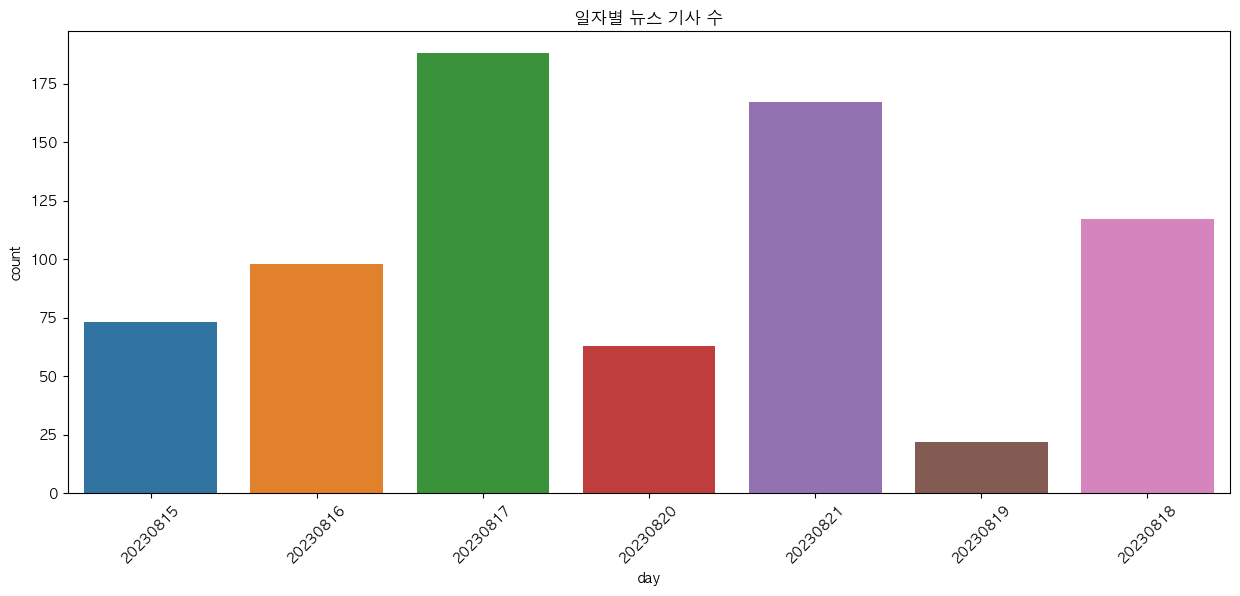

In [32]:
# 일자별 뉴스 기사 수
plt.figure(figsize=(15, 6))
sns.countplot(x='day', data=interest_df)
plt.title('일자별 뉴스 기사 수')
plt.xticks(rotation=45)
plt.show()

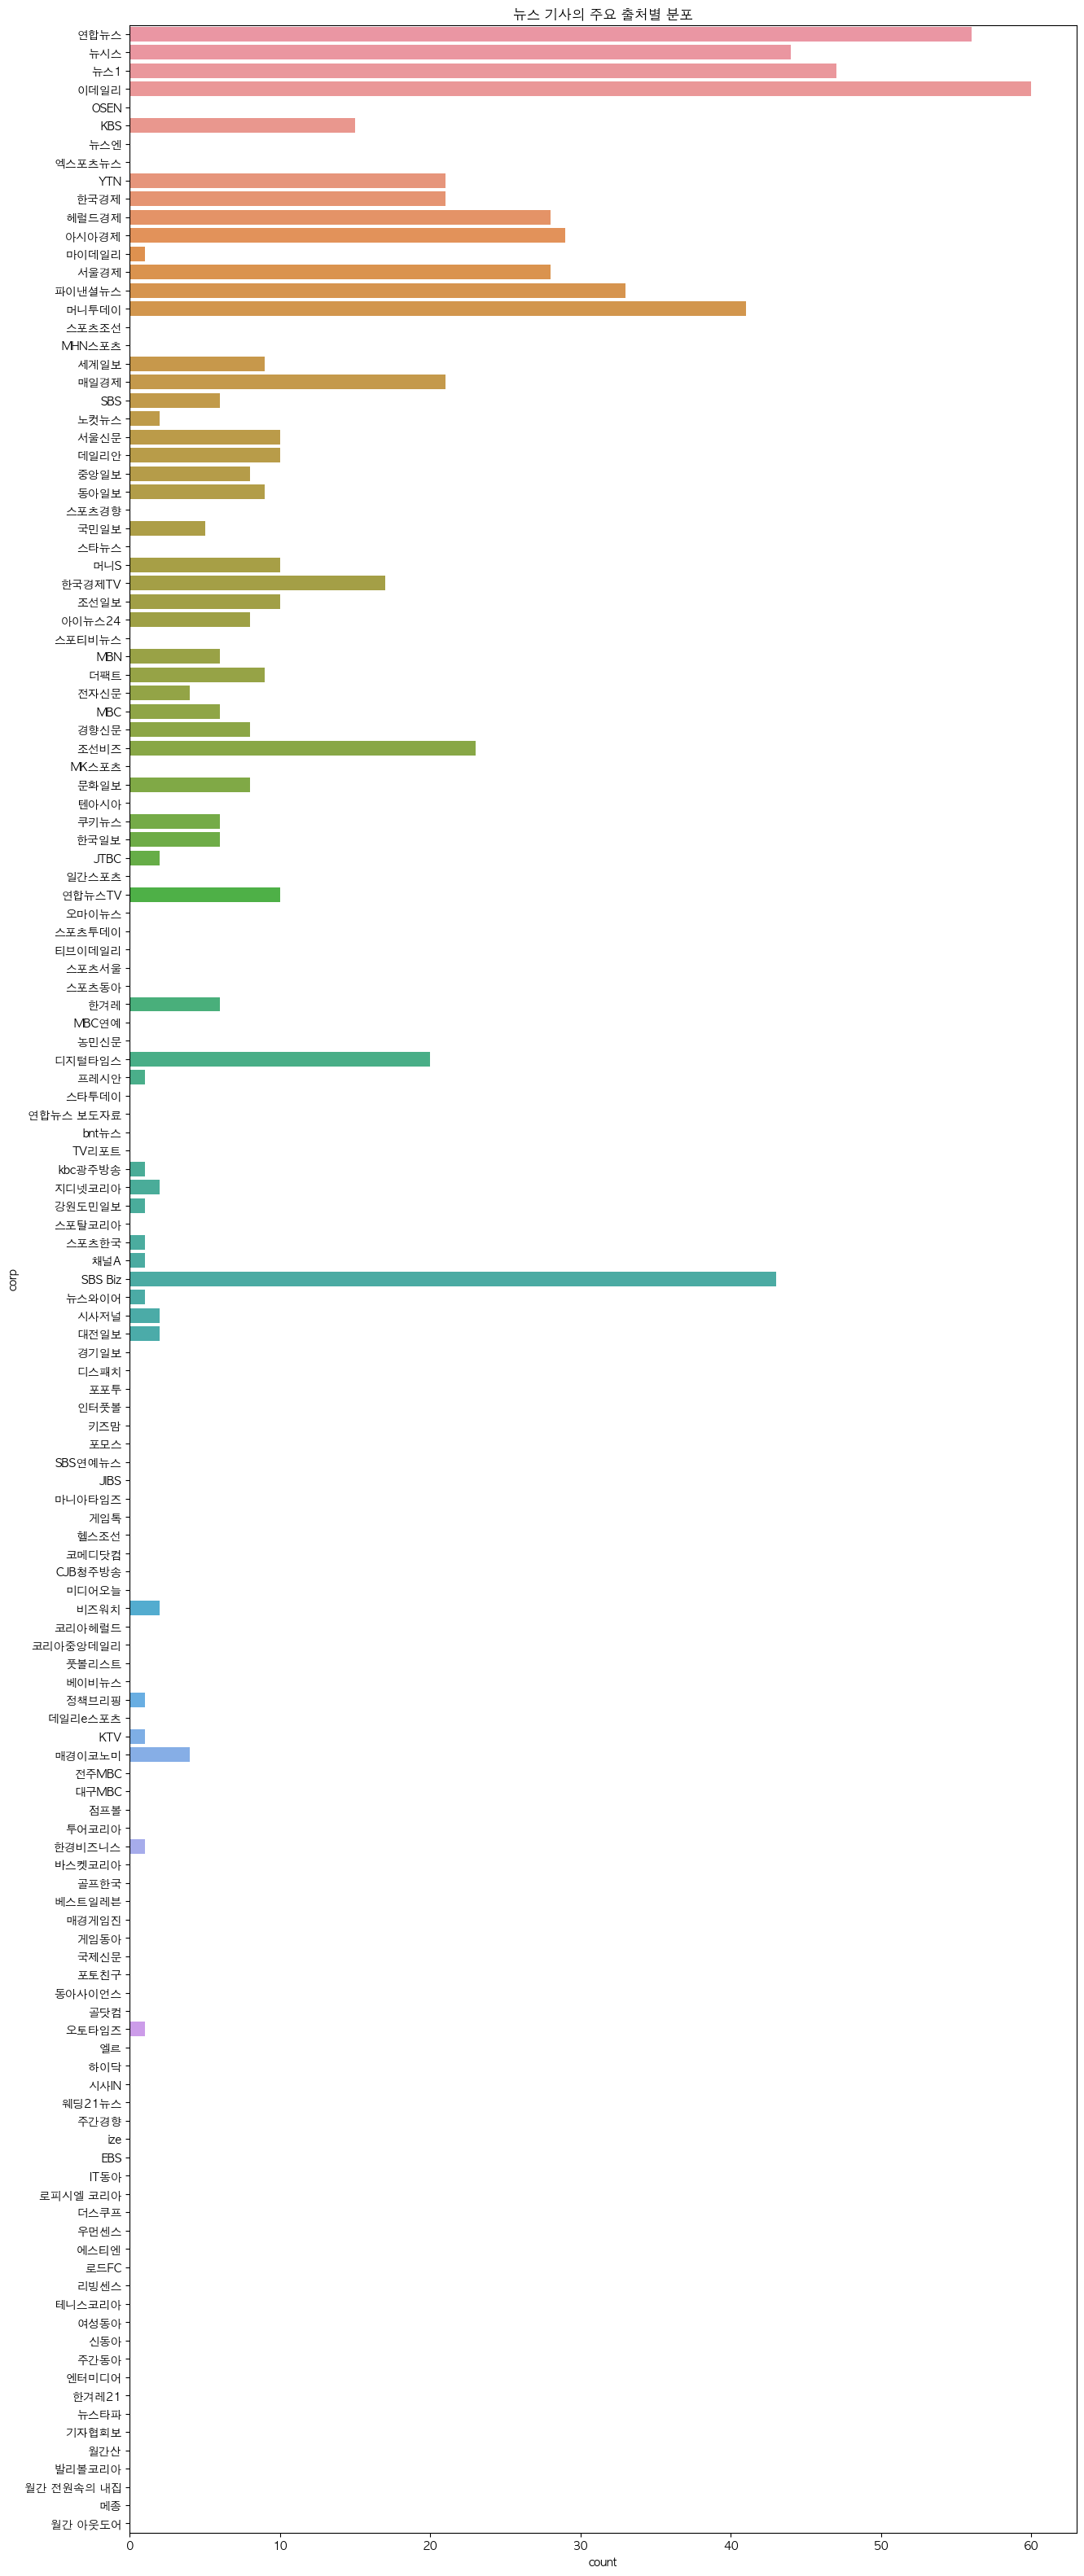

In [33]:
# 뉴스 기사의 주요 출처별 분포
plt.figure(figsize=(15, 40))
sns.countplot(y='corp', data=interest_df, order=df['corp'].value_counts().index)
plt.title('뉴스 기사의 주요 출처별 분포')
plt.show()

In [34]:
# interest_df['ner'].str.contains("ORGANIZATION")
# true_count = (interest_df['ner'].str.contains("ORGANIZATION") == True).sum()
# print(true_count)

In [35]:
# NER를 활용한 주요 기관/조직, 장소, 용어의 빈도수
def get_ner_counts(df, tag):
    result = Counter()
    for ner_data in df['ner']:
        for sentence in ner_data:
            for word, word_tag in sentence:  # (word, word_tag) 튜플에서 값을 얻습니다.
                if word_tag == tag:
                    result[word] += 1
    return result

organizations = get_ner_counts(interest_df, 'ORGANIZATION')
locations = get_ner_counts(interest_df, 'LOCATION')
terms = get_ner_counts(interest_df, 'TERM')

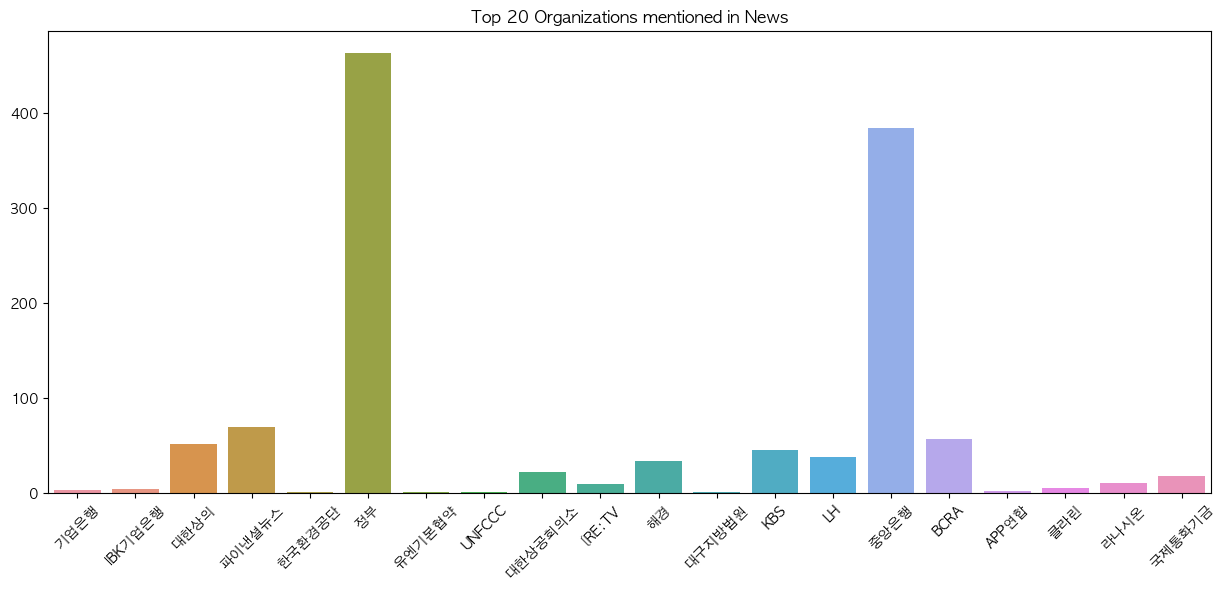

In [36]:
# 상위 20개의 기관/조직 출력
plt.figure(figsize=(15, 6))
sns.barplot(x=list(organizations.keys())[:20], y=list(organizations.values())[:20])
plt.title('Top 20 Organizations mentioned in News')
plt.xticks(rotation=45)
plt.show()

In [37]:
interest_df['parsing'].iloc[4]['parsing_NN']['text']
# interest_df['parsing']['parsing_NN']

['입력',
 '음성',
 '음성',
 '재생',
 '설정',
 '남성',
 '여성',
 '느림',
 '보통',
 '빠름',
 '음성',
 '재생',
 '음성',
 '재생',
 '중지',
 '번역',
 '설정',
 '번역',
 '한국어',
 '영어',
 '日本',
 '일본어',
 '中文',
 '중국어',
 '독일어',
 '러시아어',
 '말',
 '레이시',
 '아어',
 '벵골어',
 '베트남어',
 '스페인어',
 '아랍어',
 '이탈리아어',
 '인도네시아어',
 '태국어',
 '터키어',
 '포르투갈어',
 '프랑스어',
 '힌디어',
 '번역',
 '글씨',
 '크기',
 '조절',
 '글자',
 '크기',
 '설정',
 '원',
 '좌우',
 '글자',
 '크기',
 '변경',
 '폰트',
 '폰트',
 '보통',
 '폰트',
 '폰트',
 '폰트',
 '글자',
 '크기',
 '변경',
 '예시',
 '뉴스',
 '정보',
 '쌍방향',
 '소통',
 '다음',
 '뉴스',
 '다음',
 '뉴스',
 '국내외',
 '주요',
 '이슈',
 '실시간',
 '속보',
 '문화',
 '생활',
 '분야',
 '뉴스',
 '입체',
 '전달',
 '인쇄',
 '카드',
 '금리',
 '영향',
 '여전',
 '간',
 '중반',
 '유지',
 '리스크',
 '수면',
 '위',
 '업계',
 '대손',
 '충당',
 '금',
 '경기',
 '둔화',
 '속',
 '카드',
 '결제',
 '리볼빙',
 '이용',
 '금액',
 '연체',
 '카드',
 '관리',
 '비상',
 '양경숙',
 '민주당',
 '의원',
 '실',
 '금융',
 '감독원',
 '자료',
 '올해',
 '기준',
 '카드',
 '사',
 '카드',
 '잔액',
 '작년',
 '말',
 '이상',
 '오후',
 '서울',
 '시내',
 '거리',
 '카드',
 '대출',
 '관련',
 '광고',
 '물',
 '부착',
 '카드',
 '평균',
 '금리',
 '상승',
 '가운데',


In [49]:
stop_words = ['특판', '타임톡', '비중은', '공감언론', '과정에서', '않도록', '규모를', '경찰에', '25', '우수', '이사', '개선', '과도하게', '제출받은', '새', '증가세가', '경제적', '돼', 'nh농협은행이', '19세', '비해',
                  '14일', '출시했다', '발표한', '취급한', '관리를', '1분기', '통신사', '것도', '정책을', '않는', '발표했다', '은행에', '있지', '앱', '금융감독원은', '자체', '최초로', '정책위의장은', '없는지', '45', '원인으로', 
                  '한도가', '지', '2023년', '작년', '결과', '중인', '금리로', '실제', '심사', '오후', '하나로', '당시', '더욱', '문제가', '그러면서', '금융감독원', '관리가', '수출', '출시', '박', '체결한', '연간', '5일',
                  '연령대', '오은영', '연체율은', '정부의', '우회하는', '은행들이', '전년', '모습', '주담대는', '주택담보대출이', '주는', '수밖에', '정부는', '전날', '가입', '첫', '있지만', '방안을', '코픽스', '기업',
                  '3분기', '하반기', '일반', '이같이', '인터넷은행의', '제보는', '이들은', '계속', '당국이', '금리도', '대학', '4명', '혐의로', '4월', '있는데', '우려가', '보면', '받고', '전했다', '있기', '이자는', '보는', 
                  '취급', '대출에', 'nh농협은행은', '17', '연방', '엄영수가', '채널', '70', '있도록', '검토하고', '담보로', '두고', '주택담보대출을', '수준이다', '지적장애인', '국유재산과', '정책에', '13', '가계부채가', '횡령',
                  '강화를', '방송', '이용', '은행이', '원인',  'kb국민', '대상', '정부', '12월', '상품으로', '기존', '다양한', '사기', '가능하다', '지적이', '카카오뱅크의', '없는', '규모의', '당초', '오늘', '매수', '제한을',
                  '20', '지적했다', '지원을', '국민', 'kbs', '이하', '40', '3월', '직접', '자금을', '은행들은', '농협은행은', '점검을', '가로챈', '경우가', '수단으로', '상황에서', '보이고', '만기가', '2분기', '카카오뱅크',
                  '두', '또는', '이는', '시장', '포함', '역할을', '자료에', '우회', '은행권의', '기록했다', '고객을', '했습니다', '가능성이', '시스템', '라고', '강조했다', '밝혔습니다', '갚는', '김희곤', '앞두고', '최고',
                  '관련해', '11월', '일부', '있을', '제도', '8월', '대출은', '없이', '간담회', '대해서는', '이벤트', '모든', '한편', '케이뱅크는', '카카오톡', '원장은', '15일', '많은', '대출의', '계획이다', '카톡', '20일',
                  '국민을', '오는', '만', '한도를', '게', '아니라', '2021년', '10', '경제', '위원장은', '케이뱅크', '점검', '있고', '때문이다', '제공', '금융권에', '국민의힘', '뉴스', '잔액은', '5대', '중구', '있어', '내부통제',
                  '없다', '받을', '있다고', '오전', '이복현', '상반기', '금융권', '향후', '금감원은', '있는지', '되는', '신한', '따른', '제대로', '등의', '엄영수는', '예정이다', '필요한', '34세', '영향을', '내지', '은행장', '집계됐다',
                  '중심으로', '5월', '면서', '제때', '24', '들어', '바', '보다', '않고', '주담대가', '것으로', '대출을', '금지', '있는', '지난해', '올해', '했다', '16일', '주담대를', '17일', '6월', '7월', '기간', '대출이', '1년',
                  '등이', '보고', '소득', '연령', '달', '미납률은', '현재', '2023', '등으로', '할', '안', '해당', '국유재산', '가운데', '된다', '평균', '돈을', '이날', '재배포금지', '21일', '이라며', '있습니다', '후', '18일',
                  '나타났다', '열린', '이를', '김주현', '하고', '신규', '국내', '높은', '다시', '정부가', '은행의', '고객', '앞서', '것은', '큰', '보인다', '15', '설명했다', '가계대출이', '나온다', '14', '것을', '수출금융', '판매를',
                  '주담대에', '것이', '규제를', '않은', '년', '지난', '최근', '말했다', '따르면', '위한', '최대', '통해', '이라고', '대한','이후', '밝혔다', '저작권자', '대해', '포인트', '대비', '같은', '경우', '관계자는', '전체', '한다',
                  '가장', '지난달', '일', '받은', '대상으로', '만에', '지원', '관련', '금융당국이', '금리는', '원', '상품을', '학자금', '무단', '있다는', '하는', '것이다', '금리를', '일', '은행권', '이달', '월', '금융당국은', '만큼',
                  '이에', '이자를', '관리', '특히', '미국', '중', '한', '재배포', '위해', '며', '무단전재', '연', '등을', 'p', '말', '더', 'kr', 'www', '전재', '전', '이어', 'c', '약', 'com', 'co', '뒤', '총', '무단복제',
                  '김', '는', 'ytn', 'pf', '그는', '건', '데', '될', '시', '올', 'copyrights', 'sbs', '다', '미', '내', '못', '은', 'news1', '잘', 'okjebo', 'a', 'https', 'mbc', 'a씨', '간', '씨', '볼', '인',
                  '파이낸셜뉴스', '노컷뉴스', 'a씨는', '윤', '대', 'url', '양', '조', '홈', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'copyright', '고', '수', '아', '휴', '아이구', '아이쿠', '아이고', '어',
                  '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희',
                  '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에',
                  '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에',
                  '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서',
                  '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면',
                  '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다',
                  '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어서 말하면', '바꾸어서 한다면', '만약', '그렇지않으면', '까악', '툭', '딱', '삐걱거리다', '보드득', '비걱거리다', '꽈당', '응당', '해야한다', '에 가서', '각', '각각',
                  '여러분', '각종', '각자', '제각기', '하도록하다', '와', '과', '그러므로', '그래서', '고로', '한 까닭에', '하기 때문에', '거니와', '이지만', '대하여', '관하여', '관한', '과연', '실로', '아니나다를가', '생각한대로', '진짜로',
                  '한적이있다', '하곤하였다', '하', '하하', '허허', '아하', '거바', '와', '오', '왜', '어째서', '무엇때문에', '어찌', '하겠는가', '무슨', '어디', '어느곳', '더군다나', '하물며', '더욱이는', '어느때', '언제', '야', '이봐',
                  '어이', '여보시오', '흐흐', '흥', '휴', '헉헉', '헐떡헐떡', '영차', '여차', '어기여차', '끙끙', '아야', '앗', '아야', '콸콸', '졸졸', '좍좍', '뚝뚝', '주룩주룩', '솨', '우르르', '그래도', '또', '그리고', '바꾸어말하면',
                  '바꾸어말하자면', '혹은', '혹시', '답다', '및', '그에 따르는', '때가 되어', '즉', '지든지', '설령', '가령', '하더라도', '할지라도', '일지라도', '지든지', '몇', '거의', '하마터면', '인젠', '이젠', '된바에야', '된이상',
                  '만큼\t어찌됏든', '그위에', '게다가', '점에서 보아', '비추어 보아', '고려하면', '하게될것이다', '일것이다', '비교적', '좀', '보다더', '비하면', '시키다', '하게하다', '할만하다', '의해서', '연이서', '이어서', '잇따라',
                  '뒤따라', '뒤이어', '결국', '의지하여', '기대여', '통하여', '자마자', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로', '당장', '하자마자', '밖에 안된다', '하면된다', '그래', '그렇지',
                  '요컨대', '다시 말하자면', '바꿔 말하면', '즉', '구체적으로', '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다', '게다가', '더구나', '하물며', '와르르', '팍', '퍽', '펄렁',
                  '동안', '이래', '하고있었다', '이었다', '에서', '로부터', '까지', '예하면', '했어요', '해요', '함께', '같이', '더불어', '마저', '마저도', '양자', '모두', '습니다', '가까스로', '하려고하다', '즈음하여', '다른',
                  '다른 방면으로', '해봐요', '습니까', '했어요', '말할것도 없고', '무릎쓰고', '개의치않고', '하는것만 못하다', '하는것이 낫다', '매', '매번', '들', '모', '어느것', '어느', '로써', '갖고말하자면', '어디', '어느쪽', '어느것',
                  '어느해', '어느 년도', '라 해도', '언젠가', '어떤것', '어느것', '저기', '저쪽', '저것', '그때', '그럼', '그러면', '요만한걸', '그래', '그때', '저것만큼', '그저', '이르기까지', '할 줄 안다', '할 힘이 있다', '너', '너희',
                  '당신', '어찌', '설마', '차라리', '할지언정', '할지라도', '할망정', '할지언정', '구토하다', '게우다', '토하다', '메쓰겁다', '옆사람', '퉤', '쳇', '의거하여', '근거하여', '의해', '따라', '힘입어', '그', '다음', '버금',
                  '두번째로', '기타', '첫번째로', '나머지는', '그중에서', '견지에서', '형식으로 쓰여', '입장에서', '위해서', '단지', '의해되다', '하도록시키다', '뿐만아니라', '반대로', '전후', '전자', '앞의것', '잠시', '잠깐', '하면서',
                  '그렇지만', '다음에', '그러한즉', '그런즉', '남들', '아무거나', '어찌하든지', '같다', '비슷하다', '예컨대', '이럴정도로', '어떻게', '만약', '만일', '위에서 서술한바와같이', '인 듯하다', '하지 않는다면', '만약에', '무엇',
                  '무슨', '어느', '어떤', '아래윗', '조차', '한데', '그럼에도 불구하고', '여전히', '심지어', '까지도', '조차도', '하지 않도록', '않기 위하여', '때', '시각', '무렵', '시간', '동안', '어때', '어떠한', '하여금', '네', '예',
                  '우선', '누구', '누가 알겠는가', '아무도', '줄은모른다', '줄은 몰랏다', '하는 김에', '겸사겸사', '하는바', '그런 까닭에', '한 이유는', '그러니', '그러니까', '때문에', '그', '너희', '그들', '너희들', '타인', '것', '것들',
                  '너', '위하여', '공동으로', '동시에', '하기 위하여', '어찌하여', '무엇때문에', '붕붕', '윙윙', '나', '우리', '엉엉', '휘익', '윙윙', '오호', '아하', '어쨋든', '만 못하다\t하기보다는', '차라리', '하는 편이 낫다', '흐흐',
                  '놀라다', '상대적으로 말하자면', '마치', '아니라면', '쉿', '그렇지 않으면', '그렇지 않다면', '안 그러면', '아니었다면', '하든지', '아니면', '이라면', '좋아', '알았어', '하는것도', '그만이다', '어쩔수 없다', '하나', '일',
                  '일반적으로', '일단', '한켠으로는', '오자마자', '이렇게되면', '이와같다면', '전부', '한마디', '한항목', '근거로', '하기에', '아울러', '하지 않도록', '않기 위해서', '이르기까지', '이 되다', '로 인하여', '까닭으로',
                  '이유만으로', '이로 인하여', '그래서', '이 때문에', '그러므로', '그런 까닭에', '알 수 있다', '결론을 낼 수 있다', '으로 인하여', '있다', '어떤것', '관계가 있다', '관련이 있다', '연관되다', '어떤것들', '에 대해', '이리하여',
                  '그리하여', '여부', '하기보다는', '하느니', '하면 할수록', '운운', '이러이러하다', '하구나', '하도다', '다시말하면', '다음으로', '에 있다', '에 달려 있다', '우리', '우리들', '오히려', '하기는한데', '어떻게', '어떻해',
                  '어찌됏어', '어때', '어째서', '본대로', '자', '이', '이쪽', '여기', '이것', '이번', '이렇게말하자면', '이런', '이러한', '이와 같은', '요만큼', '요만한 것', '얼마 안 되는 것', '이만큼', '이 정도의', '이렇게 많은 것',
                  '이와 같다', '이때', '이렇구나', '것과 같이', '끼익', '삐걱', '따위', '와 같은 사람들', '부류의 사람들', '왜냐하면', '중의하나', '오직', '오로지', '에 한하다', '하기만 하면', '도착하다', '까지 미치다', '도달하다',
                  '정도에 이르다', '할 지경이다', '결과에 이르다', '관해서는', '여러분', '하고 있다', '한 후', '혼자', '자기', '자기집', '자신', '우에 종합한것과같이', '총적으로 보면', '총적으로 말하면', '총적으로', '대로 하다', '으로서',
                  '참', '그만이다', '할 따름이다', '쿵', '탕탕', '쾅쾅', '둥둥', '봐', '봐라', '아이야', '아니', '와아', '응', '아이', '참나', '년', '월', '일', '령', '영', '일', '이', '삼', '사', '오', '육', '륙', '칠',
                  '팔', '구', '이천육', '이천칠', '이천팔', '이천구', '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영', '', '폰트', '스포츠',  '크기', '음성', '연예', '글자', '설정', '번역', '재생', '해외','축구',  '포토',  '톡', '야구', '타임']

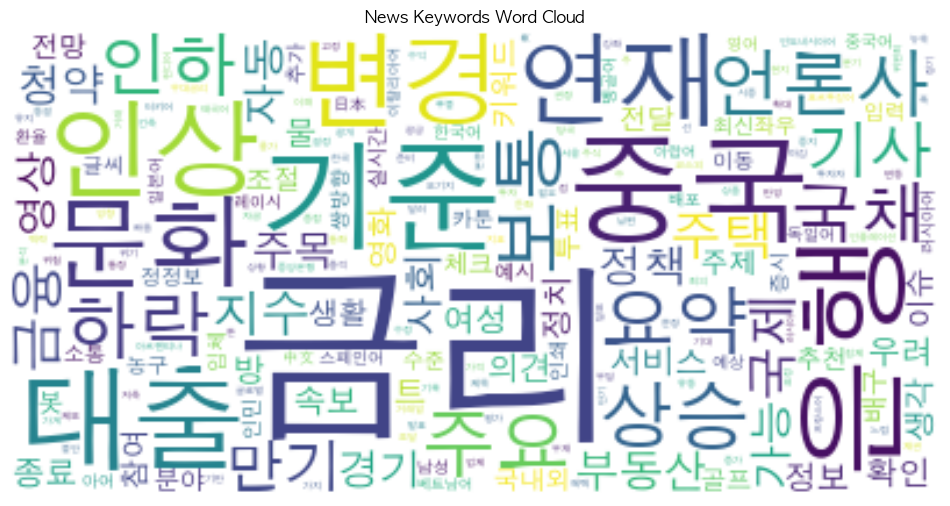

In [50]:
# 주요 명사들의 빈도수를 바탕으로 Word Cloud 생성
def get_noun_counts(df):
    result = Counter()
    for i in range(len(df['parsing'])):
        for noun_list in df['parsing'].iloc[i]['parsing_NN']['text']:
            if noun_list not in stop_words:
            # for noun in noun_list:
                # result[noun] += 1
                result[noun_list] += 1
    return result

nouns = get_noun_counts(interest_df)

wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf', background_color='white').generate_from_frequencies(nouns)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('News Keywords Word Cloud')
plt.show()

In [45]:
nouns

Counter({'금리': 8168,
         '폰트': 3485,
         '스포츠': 2886,
         '크기': 2789,
         '음성': 2394,
         '연예': 2155,
         '은행': 2149,
         '글자': 2091,
         '기준': 2049,
         '중국': 2030,
         '설정': 1961,
         '번역': 1956,
         '대출': 1861,
         '재생': 1797,
         '인상': 1674,
         '해외': 1510,
         '축구': 1450,
         '포토': 1447,
         '톡': 1445,
         '야구': 1443,
         '타임': 1435,
         '연재': 1435,
         '변경': 1427,
         '문화': 1424,
         '언론사': 1387,
         '상승': 1384,
         '요약': 1376,
         '주요': 1335,
         '하락': 1321,
         '보통': 1302,
         '인하': 1277,
         '국채': 1248,
         '기사': 1198,
         '만기': 1080,
         '금융': 1020,
         '국제': 971,
         '주택': 945,
         '지수': 939,
         '부동산': 928,
         '청약': 926,
         '자동': 924,
         '가능': 914,
         '정책': 904,
         '영상': 869,
         '경기': 839,
         '주목': 835,
         '사회': 823,
         '서비스': 804,
  

In [40]:
Counter(nouns)

Counter({'뉴스': 9699,
         '금리': 8168,
         '폰트': 3485,
         '경제': 2924,
         '홈': 2914,
         '스포츠': 2886,
         '크기': 2789,
         '음성': 2394,
         '연예': 2155,
         '은행': 2149,
         '글자': 2091,
         '기준': 2049,
         '중국': 2030,
         '설정': 1961,
         '번역': 1956,
         '대출': 1861,
         '재생': 1797,
         '미국': 1772,
         '시장': 1708,
         '인상': 1674,
         '다음': 1549,
         '해외': 1510,
         '축구': 1450,
         '포토': 1447,
         '톡': 1445,
         '야구': 1443,
         '타임': 1435,
         '연재': 1435,
         '변경': 1427,
         '문화': 1424,
         '포인트': 1414,
         '언론사': 1387,
         '상승': 1384,
         '요약': 1376,
         '주요': 1335,
         '하락': 1321,
         '보통': 1302,
         '인하': 1277,
         '국채': 1248,
         '말': 1213,
         '기사': 1198,
         '만기': 1080,
         '금융': 1020,
         '국제': 971,
         '주택': 945,
         '지수': 939,
         '부동산': 928,
         '청약': 9

In [41]:
sorted(Counter(nouns).items(), key=operator.itemgetter(1), reverse=True)

[('뉴스', 9699),
 ('금리', 8168),
 ('폰트', 3485),
 ('경제', 2924),
 ('홈', 2914),
 ('스포츠', 2886),
 ('크기', 2789),
 ('음성', 2394),
 ('연예', 2155),
 ('은행', 2149),
 ('글자', 2091),
 ('기준', 2049),
 ('중국', 2030),
 ('설정', 1961),
 ('번역', 1956),
 ('대출', 1861),
 ('재생', 1797),
 ('미국', 1772),
 ('시장', 1708),
 ('인상', 1674),
 ('다음', 1549),
 ('해외', 1510),
 ('축구', 1450),
 ('포토', 1447),
 ('톡', 1445),
 ('야구', 1443),
 ('타임', 1435),
 ('연재', 1435),
 ('변경', 1427),
 ('문화', 1424),
 ('포인트', 1414),
 ('언론사', 1387),
 ('상승', 1384),
 ('요약', 1376),
 ('주요', 1335),
 ('하락', 1321),
 ('보통', 1302),
 ('인하', 1277),
 ('국채', 1248),
 ('말', 1213),
 ('기사', 1198),
 ('만기', 1080),
 ('금융', 1020),
 ('국제', 971),
 ('주택', 945),
 ('지수', 939),
 ('부동산', 928),
 ('청약', 926),
 ('자동', 924),
 ('가능', 914),
 ('정책', 904),
 ('영상', 869),
 ('원', 844),
 ('이후', 844),
 ('경기', 839),
 ('주목', 835),
 ('사회', 823),
 ('시각', 815),
 ('일반', 812),
 ('서비스', 804),
 ('의견', 804),
 ('우려', 801),
 ('물', 792),
 ('종료', 789),
 ('속보', 788),
 ('확인', 779),
 ('트', 774),
 ('여성', 766),
 ('정보'